# 1. Classificando dados

In [42]:
import pandas as pd

In [43]:
data = pd.read_csv("data/emp_automovel.csv")
data

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [44]:
data['inadimplente'].value_counts()

inadimplente
0    49309
1     4716
Name: count, dtype: int64

In [45]:
data.describe()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
count,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000
mean,17410.722321,2779.063672,12.147035,0.278075,2.022922,0.490915,0.522771,0.512252,0.117734,975.491009,0.087293
std,9658.762569,1305.364734,7.452120,0.448055,0.498807,0.142389,0.875945,0.062725,0.076180,818.141709,0.282266
min,2700.000000,218.700000,0.000000,0.000000,1.000000,0.014568,0.000005,0.000527,0.000000,0.000000,0.000000
25%,11700.000000,2002.500000,12.157324,0.000000,2.000000,0.492810,0.407054,0.513171,0.091800,302.000000,0.000000
50%,16855.246324,2722.188351,12.157324,0.000000,2.000000,0.501213,0.554789,0.513171,0.117428,810.000000,0.000000
75%,20250.000000,3199.500000,12.157324,1.000000,2.000000,0.501213,0.659141,0.513171,0.117428,1563.000000,0.000000
max,450000.000000,22500.000000,69.000000,1.000000,3.000000,0.942680,100.000000,0.869211,1.000000,4185.000000,1.000000


## Decision Tree Classifier

In [46]:
x = data.drop(columns= 'inadimplente') # variáveis explicativas
y = data['inadimplente'] # variável alvo

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dtc = DecisionTreeClassifier()
dtc.fit(x, y)

print(f"DTC score: {dtc.score(x, y)}")

DTC score: 1.0


### **OPEN - Dividing data into 3: train, validation and test**

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_split, x_test, y_split, y_test = train_test_split(x, y, test_size= .125, stratify= y, random_state= 42)

In [51]:
x_train, x_valid, y_train, y_valid = train_test_split(x_split, y_split, test_size= .125, stratify= y_split, random_state= 42)

In [52]:
dtc = DecisionTreeClassifier(max_depth=10)
dtc.fit(x_train, y_train)

print(f"DTC Train score: {dtc.score(x_valid, y_valid)} x {dtc.score(x_train, y_train)}")

DTC Train score: 0.9082755119309528 x 0.9200473864900149


### Avaliar o modelo

In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
y_predicted_dtc = dtc.predict(x_valid)
con_matrix = confusion_matrix(y_valid, y_predicted_dtc)
print(con_matrix)

[[5353   40]
 [ 502   14]]


In [55]:
from sklearn.metrics import ConfusionMatrixDisplay

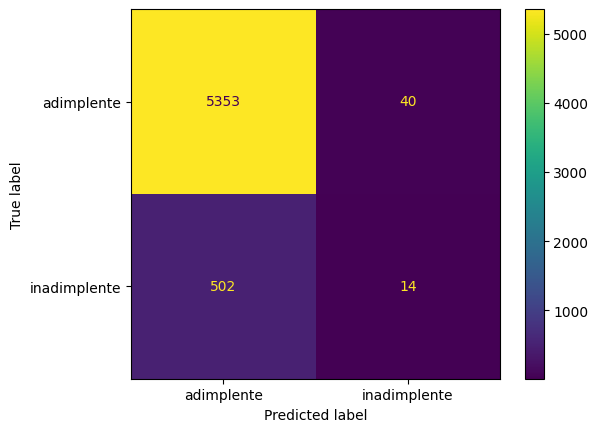

In [56]:
graph = ConfusionMatrixDisplay(con_matrix, display_labels=['adimplente', 'inadimplente'])
graph.plot();

In [57]:
# from sklearn.ensemble import RandomForestClassifier

In [58]:
# rfc = RandomForestClassifier(max_depth=5)
# rfc.fit(x_train, y_train)
# rfc.score(x_valid, y_valid)

In [59]:
# from sklearn.metrics import confusion_matrix

In [60]:
# y_predicted_rfc = rfc.predict(x_valid)
# rfc_conf_mat = confusion_matrix(y_valid, y_predicted_rfc)

In [61]:
# from sklearn.metrics import ConfusionMatrixDisplay

In [62]:
# graph_rfc = ConfusionMatrixDisplay(rfc_conf_mat)
# graph_rfc.plot();

### **Acurácia, precisão, recall e f1-score**

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, y_predicted_dtc) * 100

90.82755119309527

In [64]:
from sklearn.metrics import precision_score
precision_score(y_valid, y_predicted_dtc) * 100

np.float64(25.925925925925924)

In [65]:
from sklearn.metrics import recall_score
recall_score(y_valid, y_predicted_dtc) * 100

np.float64(2.7131782945736433)

In [66]:
from sklearn.metrics import f1_score
f1_score(y_valid, y_predicted_dtc) * 100

np.float64(4.912280701754386)

### **ROC**

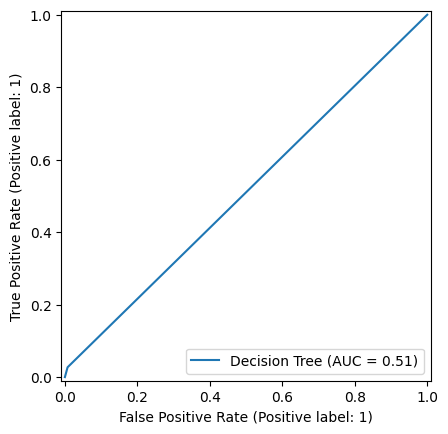

In [67]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_valid, y_predicted_dtc, name='Decision Tree');

**Modelo ruim, pois está na curva**

In [68]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_valid, y_predicted_dtc)

np.float64(0.5098573804400479)

### **Curva precisão x recall**

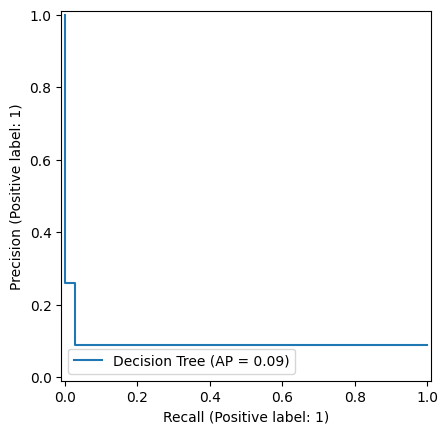

In [69]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_predictions(y_valid, y_predicted_dtc, name='Decision Tree');

**Modelo ruim, pois está próximo de (0,0)**

In [70]:
from sklearn.metrics import average_precision_score
average_precision_score(y_valid, y_predicted_dtc)

np.float64(0.09198931910509701)

### **Relatório das métricas de uma vez**

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, y_predicted_dtc))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5393
           1       0.26      0.03      0.05       516

    accuracy                           0.91      5909
   macro avg       0.59      0.51      0.50      5909
weighted avg       0.86      0.91      0.87      5909



## Validação cruzada

### **Para a Acurácia**

In [72]:
from sklearn.model_selection import cross_validate, KFold

In [73]:
dtc_model = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_resultados = cross_validate(dtc_model, x_split, y_split, cv=kf)
cv_resultados

{'fit_time': array([0.36708403, 0.25682235, 0.28623652, 0.28324223, 0.2822423 ]),
 'score_time': array([0.00498843, 0.00498509, 0.00398779, 0.00399017, 0.00299191]),
 'test_score': array([0.90872554, 0.91326423, 0.91051407, 0.90469642, 0.90332135])}

In [74]:
cv_resultados['test_score']

array([0.90872554, 0.91326423, 0.91051407, 0.90469642, 0.90332135])

In [75]:
media = cv_resultados['test_score'].mean()
dp = cv_resultados['test_score'].std()
print(f"Invervalo confiança: ({media - 2*dp}, {min(media + 2*dp, 1)})")

Invervalo confiança: (0.9007663088482866, 0.9154423340312551)


### **Para o Recall**

In [76]:
dtc_model = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_resultados = cross_validate(dtc_model, x_split, y_split, cv=kf, scoring='recall')
print(f"Média de {cv_resultados['test_score'].mean()} com variância de {cv_resultados['test_score'].var()}")

Média de 0.028025836722755892 com variância de 7.110827322176943e-05


In [77]:
cv_resultados['test_score'].mean()

np.float64(0.028025836722755892)

### **Estratificando os dados**

In [78]:
from sklearn.model_selection import StratifiedKFold

In [79]:
dtc_model = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_resultados = cross_validate(dtc_model, x_split, y_split, cv=skf, scoring='recall')
print(f"Média de {cv_resultados['test_score'].mean()} com variância de {cv_resultados['test_score'].var()}")

Média de 0.027388363049379992 com variância de 4.330315246208202e-05


## Balancear os dados

### Oversampling

In [80]:
from imblearn.over_sampling import SMOTE

In [81]:
oversample = SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(x_split, y_split)

In [83]:
y_balanceado.value_counts()

inadimplente
0    43145
1    43145
Name: count, dtype: int64

In [85]:
dtc_model = DecisionTreeClassifier(max_depth=10, random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_resultados = cross_validate(dtc_model, x_balanceado, y_balanceado, cv=skf, scoring='recall')

{'fit_time': array([0.95736837, 0.61934423, 0.60096288, 0.62732458, 0.58741498]),
 'score_time': array([0.02094245, 0.01196885, 0.01296639, 0.01894832, 0.01019311]),
 'test_score': array([0.73635415, 0.74632055, 0.75199907, 0.7389037 , 0.73507938])}

In [89]:
cv_resultados['test_score'].mean()

np.float64(0.741731370958396)

### Pipeline para validação

In [90]:
from imblearn.pipeline import Pipeline as imbpipeline

In [92]:
oversample = SMOTE()
dtc_model = DecisionTreeClassifier(max_depth=10, random_state=42)
pipeline = imbpipeline(
    [
        ('oversample', oversample),
        ('arvore', dtc_model)
    ]
)

In [93]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_resultados = cross_validate(pipeline, x_split, y_split, cv=skf, scoring='recall')

In [94]:
cv_resultados['test_score'].mean()

np.float64(0.23485655587350504)

### Undersampling

In [95]:
from imblearn.under_sampling import NearMiss

In [110]:
pipeline = imbpipeline(
    [
        ('undersampling', NearMiss(version=3)),
        ('arvore', dtc_model)
    ]
)

In [111]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_resultados = cross_validate(pipeline, x_split, y_split, cv=skf, scoring='recall')

In [112]:
# near miss - version 1
cv_resultados['test_score'].mean()

np.float64(0.7624782449189229)

In [109]:
# near miss - version 2
cv_resultados['test_score'].mean()

np.float64(0.9362612077188348)

In [106]:
# near miss - version 3
cv_resultados['test_score'].mean()

np.float64(0.6505193337735711)

# **Etapa final - testando o modelo**

### NearMiss - version 3

In [113]:
undersample = NearMiss(version=3)
x_balanceado, y_balanceado = undersample.fit_resample(x_split, y_split)

In [114]:
dtc_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dtc_model.fit(x_balanceado, y_balanceado)
y_previsto = dtc_model.predict(x_test)

              precision    recall  f1-score   support

           0       0.94      0.53      0.68      6164
           1       0.12      0.64      0.19       590

    accuracy                           0.54      6754
   macro avg       0.53      0.58      0.44      6754
weighted avg       0.87      0.54      0.64      6754



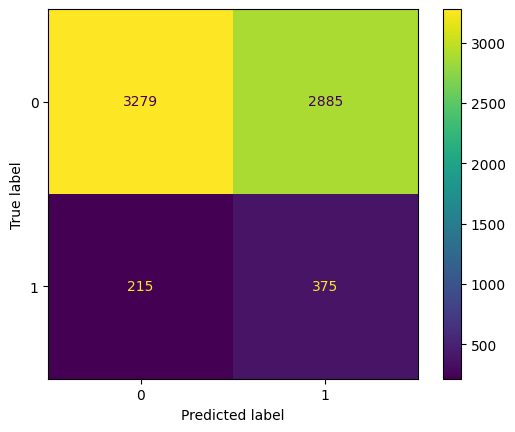

In [115]:
print(classification_report(y_test, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto);

### NearMiss - version 2

              precision    recall  f1-score   support

           0       0.95      0.10      0.18      6164
           1       0.09      0.95      0.17       590

    accuracy                           0.17      6754
   macro avg       0.52      0.52      0.17      6754
weighted avg       0.88      0.17      0.18      6754



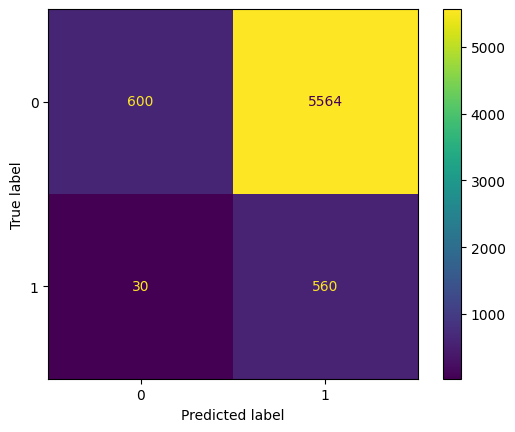

In [116]:
undersample = NearMiss(version=2)
x_balanceado, y_balanceado = undersample.fit_resample(x_split, y_split)

dtc_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dtc_model.fit(x_balanceado, y_balanceado)
y_previsto = dtc_model.predict(x_test)

print(classification_report(y_test, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto);

### NearMiss - version 1

              precision    recall  f1-score   support

           0       0.91      0.23      0.37      6164
           1       0.09      0.76      0.15       590

    accuracy                           0.27      6754
   macro avg       0.50      0.49      0.26      6754
weighted avg       0.84      0.27      0.35      6754



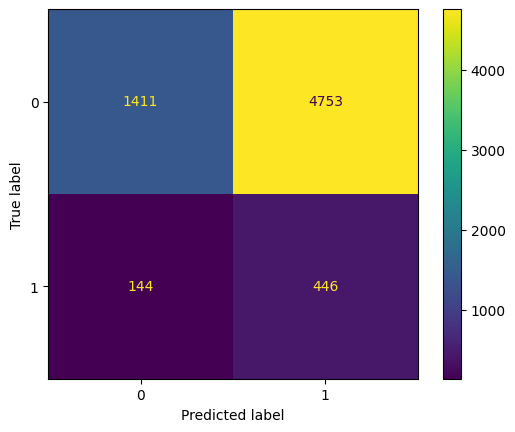

In [117]:
undersample = NearMiss(version=1)
x_balanceado, y_balanceado = undersample.fit_resample(x_split, y_split)

dtc_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dtc_model.fit(x_balanceado, y_balanceado)
y_previsto = dtc_model.predict(x_test)

print(classification_report(y_test, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto);

# Desafios

## Validação com outra métricas

In [124]:
cv_outros_resultados = cross_validate(dtc_model, x_split, y_split, cv=skf, scoring=['accuracy', 'precision', 'f1'])

In [130]:
for metrica in ['test_accuracy', 'test_precision', 'test_f1']:
    print(f"{metrica}: {cv_outros_resultados[metrica].mean()}")

test_accuracy: 0.9084639642849671
test_precision: 0.27648387513644745
test_f1: 0.05370664166224787


## Outros métodos de balanceamento

In [132]:
from imblearn.combine import SMOTEENN

In [133]:
pipeline_SMOTEENN = imbpipeline(
    [
        ('smoteenn', SMOTEENN()),
        ('arvote', dtc_model)
    ]
)

In [134]:
cv_resultados_smoteenn = cross_validate(pipeline_SMOTEENN, x_split, y_split, cv=skf, scoring='recall')

In [135]:
cv_resultados_smoteenn['test_score'].mean()

np.float64(0.359183212267958)